# Installing Dependencies

In [ ]:
!pip install -q transformers einops accelerate langchain bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.5/807.5 kB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 84.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.6/252.6 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 19.3 MB/s eta 0:00:00


In [ ]:
!pip install -q datasets transformers sentence_transformers faiss-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.0 MB/s eta 0:00:00


In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
!huggingface-cli whoami

shyamshanckin6


# Uploading the Curated Dataset from Hugging Face

In [ ]:
from datasets import load_dataset

dataset = load_dataset("shyamshanckin6/Llama2-intruction-data")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
dataset['train'].to_pandas()

,inputs
0,<s>[INST] <<SYS>>\nYour an assitant that extra...
1,<s>[INST] <<SYS>>\nYour an assitant that extra...
2,<s>[INST] <<SYS>>\nYour an assitant that extra...
3,<s>[INST] <<SYS>>\nYour an assitant that extra...
4,<s>[INST] <<SYS>>\nYour an assitant that extra...
...,...
76,<s>[INST] <<SYS>>\nYour an assitant that extra...
77,<s>[INST] <<SYS>>\nYour an assitant that extra...
78,<s>[INST] <<SYS>>\nYour an assitant that extra...
79,<s>[INST] <<SYS>>\nYour an assitant that extra...


In [ ]:
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import seaborn

tokenizer = AutoTokenizer.from_pretrained("NousResearch/Llama-2-7b-hf")
tokenizer

tokenizer_config.json:   0%|          | 0.00/746 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/435 [00:00<?, ?B/s]

LlamaTokenizerFast(name_or_path='NousResearch/Llama-2-7b-hf', vocab_size=32000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='left', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '<unk>'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	0: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	1: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
}

# Visualizing the distribution of the dataset

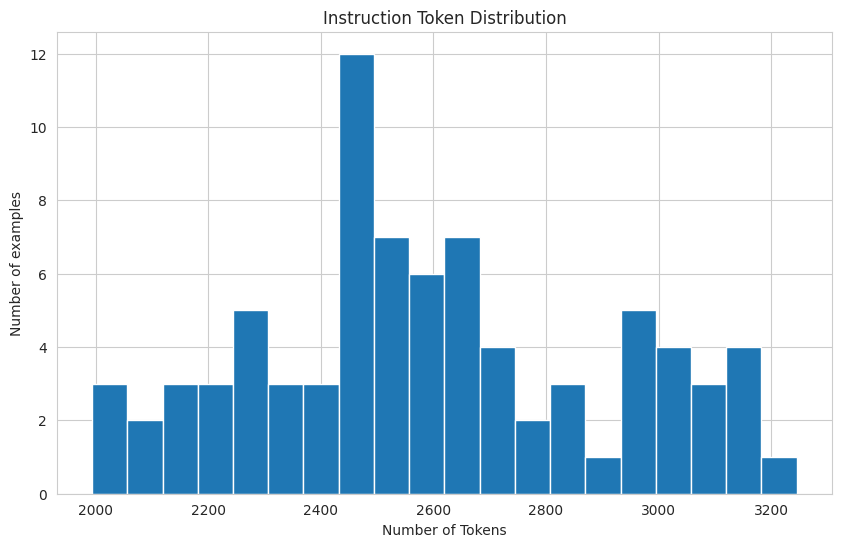

In [ ]:
instruction_token_counts = [len(tokenizer.tokenize(example['inputs'])) for example in dataset['train']]
instruction_token_counts

import seaborn as sns

def plot_distribution(token_counts, title):
  sns.set_style('whitegrid')
  plt.figure(figsize=(10, 6))
  plt.hist(token_counts, bins=20)
  plt.title(title)
  plt.xlabel('Number of Tokens')
  plt.ylabel('Number of examples')
  plt.show()

plot_distribution(instruction_token_counts, 'Instruction Token Distribution')

In [ ]:
#Filtering out tokens to tell how many tokens to be present as per a threshold length
valid_indices = [i for i, count in enumerate(instruction_token_counts) if count <= 8000]
print(len(valid_indices))
print(len(dataset['train']) - len(valid_indices))

print(instruction_token_counts)


#To calculate the total number of tokens
count = 0
for i in range(len(instruction_token_counts)):
  count += instruction_token_counts[i]
print(count)


81
0
[2243, 2495, 2430, 2435, 2616, 3245, 2460, 2552, 2509, 3005, 2387, 2593, 2820, 2325, 2243, 2447, 2249, 2708, 2563, 2793, 2665, 2878, 2723, 2668, 2437, 2513, 2087, 2666, 2617, 2299, 2797, 2305, 2058, 2155, 2623, 2210, 2515, 2941, 3152, 2961, 3009, 2958, 3166, 2474, 2679, 2826, 2958, 2433, 2702, 3061, 2523, 2056, 2868, 2401, 3041, 2316, 3084, 3144, 2314, 1994, 2653, 2490, 2543, 2587, 2594, 2024, 2138, 2702, 2948, 3064, 3174, 2247, 2480, 3032, 2625, 2266, 2441, 2448, 2133, 2456, 2472]
209912


In [ ]:
'''
#from sentence_transformers import SentenceTransformer
import faiss
from datasets import Dataset, DatasetDict
from tqdm.autonotebook import tqdm
import numpy as np

def deduplicate_dataset(dataset: Dataset, model : str, threshold : float):
  sentence_model = SentenceTransformer(model)
  instructions = (example['inputs'] for example in dataset['train'])

  print('Converting Text to Embeddings....')
  embeddings = sentence_model.encode(instructions, show_progress_bar=True)
  dimension = embeddings.shape[1]
  index = faiss.IndexFlatIP(dimension)
  normalized_embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)
  index.add(normalized_embeddings)

  print('Filtering Out  Near_Duplicates...')
  D, I = index.search(normalized_embeddings, k = 2)
  to_keep = []
  for i in tqdm(range(len(embeddings)), desc = 'Filtering'):

    if D[i,1] < threshold:
      to_keep.append(i)

  dataset = dataset['train'].select(to_keep)
  return dataset

deduplicated_dataset = deduplicate_dataset(dataset, model = 'thenlper/gte-large', threshold = 0.99)

'''

# Installing Dependencies for Finetuning

In [ ]:
!pip install -q  -U transformers accelerate bitsandbytes peft trl wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.8/258.8 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.5 MB/s eta 0:00:00


In [ ]:
!pip install accelerate

In [ ]:
!pip install -i https://pypi.org/simple/ bitsandbytes

Looking in indexes: https://pypi.org/simple/


In [ ]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.0
    Uninstalling tensorboard-2.12.0:
      Successfully uninstalled tensorboard-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Succes

In [ ]:
import os
import torch
from datasets import load_dataset
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    TrainingArguments)
import transformers
from peft import LoraConfig, PeftModel, prepare_model_for_kbit_training
from trl import SFTTrainer

In [ ]:
based_model = "NousResearch/Llama-2-7b-chat-hf"

new_model = 'llama-2-7b-chat-resume'

t_dataset = load_dataset("shyamshanckin6/Llama2-intruction-data", split = 'train')

e_dataset = load_dataset("shyamshanckin6/Llama2-intruction-data", split = 'test')

tokenizer = AutoTokenizer.from_pretrained(based_model, use_fast = True)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = 'right'

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/746 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/21.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/435 [00:00<?, ?B/s]

In [ ]:
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type='nf4',
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant = True,
)

peft_config = LoraConfig(
    r = 16,
    lora_alpha = 32, # Impact/Strength it has on the model
    lora_dropout = 0.05,
    bias = 'none',
    task_type = 'CAUSAL_LM',
    target_modules = ['up_proj',  'down_proj',  'gate_proj',  'k_proj',  'q_proj',   'v_proj', 'o_proj']
)

model = AutoModelForCausalLM.from_pretrained(
    based_model,
    quantization_config = bnb_config,
    device_map = {'' : 0 },
)

model = prepare_model_for_kbit_training(model)

model.config.use_cache = False


config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/179 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:410: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:415: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuratio

In [ ]:
e_dataset

Dataset({
    features: ['inputs'],
    num_rows: 21
})

In [ ]:
training_arguments = TrainingArguments(
    output_dir = "./results",
    num_train_epochs = 4,
    per_device_train_batch_size = 1, # Was 5 before
    gradient_accumulation_steps = 1,
    evaluation_strategy = 'steps',
    eval_steps = 1000,
    logging_steps = 1,
    optim = 'paged_adamw_8bit',
    learning_rate = 2e-4,
    lr_scheduler_type = 'linear',
    warmup_steps = 10,
    report_to = "tensorboard",
    max_steps = 4, # Remove this line for (real) training,
    )

trainer = SFTTrainer(
    model = model,
    train_dataset = t_dataset,
    eval_dataset = e_dataset,
    peft_config = peft_config,
    dataset_text_field = 'inputs',
    max_seq_length = 4096,
    tokenizer = tokenizer,
    args = training_arguments,
)

trainer.train()

trainer.model.save_pretrained(new_model)
trainer.tokenizer.save_pretrained(new_model)

Step,Training Loss,Validation Loss


('llama-2-7b-chat-resume/tokenizer_config.json',
 'llama-2-7b-chat-resume/special_tokens_map.json',
 'llama-2-7b-chat-resume/tokenizer.model',
 'llama-2-7b-chat-resume/added_tokens.json',
 'llama-2-7b-chat-resume/tokenizer.json')

# Results Post Finetuning

In [ ]:
from tensorboard import notebook
log_dir = "results/runs"
notebook.start("--logdir {} --port 4000".format(log_dir))

In [ ]:
instruction = '{ "inputs": "<s>[INST] <<SYS>>\n{{ \nYour an assitant that extract relevant features from the resume and give an explanation and score based on a weighted schema for the resume given a job description \n }}\n<</SYS>>\n\n{{ Given this Job Description: Job Title: Machine Learning Engineer - Generative AI\n\nRoles:\n- Develop, train, and optimize state-of-the-art generative AI models for various applications\n- Collaborate with cross-functional teams to integrate generative AI capabilities into products and services\n- Conduct research and experimentation with cutting-edge generative AI techniques and architectures\n- Design and implement efficient model deployment pipelines and infrastructure\n\nResponsibilities:\n- Build and fine-tune large language models, diffusion models, and other generative AI models\n- Explore and implement techniques for controlled generation, prompt engineering, and model customization\n- Develop and maintain model evaluation and monitoring systems to ensure model performance and safety\n- Contribute to the development of model interpretation and explainability tools\n- Stay up-to-date with the latest advancements in generative AI and related fields\n\nQualifications:\n- Masters or Ph.D. degree in Computer Science, Machine Learning, or a related field\n- Strong background in deep learning, natural language processing, and generative modeling\n- Hands-on experience with popular deep learning frameworks (e.g., PyTorch, TensorFlow, Hugging Face)\n- Familiarity with distributed training and model deployment on cloud platforms\n- Excellent problem-solving, analytical, and communication skills\n\nSkills/Technologies:\n- Python, PyTorch, TensorFlow, Hugging Face Transformers\n- Large Language Models (GPT, BERT, T5, etc.), Diffusion Models, Generative Adversarial Networks (GANs)\n- Natural Language Processing (NLP), Text Generation, Image Generation\n- Cloud Computing (AWS, GCP, Azure), Kubernetes, Docker\n- Git, CI/CD, MLOps practices\n\nLocation: Remote (United States)\n\nAnd Resume:\n**Position Name:** Machine Learning Engineer - Generative AI\n\n**Years of Experience:** 5+ years\n\n**Qualifications:**\n- Ph.D. in Computer Science, specializing in Machine Learning and Natural Language Processing\n- Strong background in deep learning, generative modeling, and natural language processing\n- Extensive hands-on experience with PyTorch, TensorFlow, and Hugging Face Transformers\n\n**Previous Work Experience:**\n- Research Scientist, XYZ AI Research Lab (3 years)\n  - Developed novel generative language models and fine-tuning techniques for controlled text generation\n  - Implemented state-of-the-art diffusion models for high-resolution image synthesis\n  - Contributed to the development of model interpretation and explainability tools\n\n- Machine Learning Engineer, ABC Tech Company (2 years)\n  - Designed and deployed large language models for various NLP tasks, including text summarization and translation\n  - Optimized model performance and implemented efficient deployment pipelines on cloud platforms\n  - Collaborated with cross-functional teams to integrate generative AI capabilities into products and services\n\n**Domain Expertise:**\n- Generative AI: Large Language Models, Diffusion Models, Generative Adversarial Networks (GANs)\n- Natural Language Processing (NLP): Text Generation, Summarization, Translation, Sentiment Analysis\n- Image Generation and Synthesis\n- Model Interpretation and Explainability\n\n**Projects Done:**\n- Developed a state-of-the-art generative language model for controlled text generation, achieving top performance on industry benchmarks\n- Implemented a diffusion model for high-resolution image synthesis, enabling the generation of photorealistic images from text prompts\n- Contributed to an open-source project for model interpretation and explainability, improving transparency and trust in AI systems\n\n**Skills:**\n- Python, PyTorch, TensorFlow, Hugging Face Transformers\n- Large Language Models (GPT, BERT, T5, etc.), Diffusion Models, Generative Adversarial Networks (GANs)\n- Natural Language Processing (NLP), Text Generation, Image Generation\n- Cloud Computing (AWS, GCP), Kubernetes, Docker\n- Git, CI/CD, MLOps practices\n\n**Certifications:**\n- Deep Learning Specialization (Coursera)\n- AWS Certified Machine Learning Specialist\n\nExtract the following features from the resume (leave blank if not present):\n- Qualification\n- Previous Work Experience\n- Years of Experience\n- Domain Expertise\n- Position Name\n- Projects Done\n- Skills\n- Certifications\n\nAfter extracting the features, carefully compare each feature with the job description to assess the candidate suitability for the role. The suitablity can be assessed in the following measure. \n\nGuidelines for scoring:\n- Consider the alignment of the candidates skills, experience, qualifications, and projects with the job requirements.\n- This idea is like conditional probability where, given the job description, the goal is to find the score of the resume.\n- Assess the relevance of the candidates background to the specific needs mentioned in the job description.\n- Use the following weighted schema to prioritize different aspects of the resume:\n - Previous Work Experience: 30%\n - Projects Done: 25%\n - Skills: 20%\n - Certifications: 10%\n - Qualifications: 5%\n - Years of Experience: 5%\n - Domain Expertise: 3%\n - Position Name: 2%\n- Provide a score between 0 and 1, where 0 indicates no relevance and 1 indicates a perfect match.\n- Generate a detailed explanation highlighting the key factors on how each feature individually contributed to the overall score using the weighted schema approach.\n\nPlease provide the extracted features, explanation of how the weighted schema was applied to arrive at the score, and finally the score. Use the following format:\n{\n \"extracted_features\": {\n \"Qualification\": \"<qualification>\",\n \"Previous Work Experience\": \"<work_experience>\",\n \"Years of Experience\": \"<years_of_experience>\",\n \"Domain Expertise\": \"<domain_expertise>\",\n \"Position Name\": \"<position_name>\",\n \"Projects Done\": \"<projects_done>\",\n \"Skills\": \"<skills>\",\n \"Certifications\": \"<certifications>\"\n },\n \"explanation\": \"<explanation>\",\n \"score\": <score>\n }} [/INST] {{ response : }} </s>" }'
pipeline = transformers.pipeline('text-generation', model = model, tokenizer = tokenizer, max_length = 4096)
result = pipeline(instruction)
print(result[0]['generated_text'][len(instruction):])



Extracted features:

* Qualification: Master's degree
* Previous work experience: 5 years
* Years of experience: 5 years
* Domain expertise: Generative AI
* Position name: Machine Learning Engineer - Generative AI
* Projects done: Developed a state-of-the-art generative language model and fine-tuned it for controlled text generation
* Skills: Python, PyTorch, TensorFlow, Hugging Face Transformers, Natural Language Processing, Text Generation, Image Generation, Cloud Computing, Kubernetes, Docker, Git, CI/CD, MLOps practices
* Certifications: Deep Learning Specialization (Coursera)

Explanation:
The candidate has a Master's degree in Computer Science, with a specialization in Machine Learning. They have 5 years of experience in the field, including 2 years as a Research Scientist and 3 years as a Machine Learning Engineer. Their domain expertise is in Generative AI, and they have worked on developing and fine-tuning state-of-the-art generative language models. They are proficient in a

# LLama2 was not considered as Mistral 7B gave better results post finetuning. Miscrosoft Phi-3 was also tried, but faced hallucinations.